<a href="https://colab.research.google.com/github/flowergum/Colorization/blob/main/My_colorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, \
                                    Dense, \
                                    MaxPool2D,\
                                    Dropout, \
                                    Flatten, \
                                    BatchNormalization, InputLayer, UpSampling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from skimage.color import rgb2lab, lab2rgb
import tensorflow as tf
from skimage.io import imsave
import numpy as np
from google.colab import files
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt

In [27]:
def processed_image(img):
  image = img.resize( (128, 128), Image.BILINEAR)
  image = np.array(image, dtype=float)
  size = image.shape
  lab = rgb2lab(1.0/255*image)
  X, Y = lab[:,:,0], lab[:,:,1:]

  Y /= 128    # нормируем выходные значение в диапазон от -1 до 1
  X = X.reshape(1, size[0], size[1], 1)
  Y = Y.reshape(1, size[0], size[1], 2)
  return X, Y, size

In [28]:
img = Image.open('drive/MyDrive/Colorization/Step_1.Small_dataset/color/1.jpg')
X, Y, size = processed_image(img)
print(X.shape, '     ', Y.shape)

(1, 128, 128, 1)       (1, 128, 128, 2)


In [29]:
model = Sequential([
  Conv2D(32,kernel_size=(3,3), input_shape=(128, 128, 1), activation ='relu', padding='same'),
	Conv2D(32,kernel_size=(3,3), activation ='relu', padding='same'),
	MaxPool2D(pool_size=(2, 2)),
	

	Conv2D(64,kernel_size=(3,3), activation ='relu', padding = 'same'),
	Conv2D(64,kernel_size=(3,3), activation ='relu', padding='same'),
  MaxPool2D(pool_size=(2, 2)),
    
	Flatten(),
  Dense(128, activation=tf.nn.relu),
  Dropout(0.25),
  Dense(10, activation=tf.nn.softmax)])

In [61]:
model = Sequential()
model.add(InputLayer(input_shape=(None, None, 1)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))

In [62]:
model.compile(optimizer='adam', loss='mse')

In [63]:
model.fit(x=X, y=Y, batch_size=1, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 664ms/step - loss: 0.3056
Epoch 2/100
1/1 [==============================] - 0s 185ms/step - loss: 0.5340
Epoch 3/100
1/1 [==============================] - 0s 189ms/step - loss: 0.9449
Epoch 4/100
1/1 [==============================] - 0s 189ms/step - loss: 0.8723
Epoch 5/100
1/1 [==============================] - 0s 191ms/step - loss: 0.7257
Epoch 6/100
1/1 [==============================] - 0s 209ms/step - loss: 0.5705
Epoch 7/100
1/1 [==============================] - 0s 184ms/step - loss: 0.5841
Epoch 8/100
1/1 [==============================] - 0s 193ms/step - loss: 0.5416
Epoch 9/100
1/1 [==============================] - 0s 185ms/step - loss: 0.5258
Epoch 10/100
1/1 [==============================] - 0s 194ms/step - loss: 0.4387
Epoch 11/100
1/1 [==============================] - 0s 189ms/step - loss: 0.2089
Epoch 12/100
1/1 [==============================] - 0s 196ms/step - loss: 0.0832
Epoch 13/100
1/1 [===================

In [64]:
img = Image.open('drive/MyDrive/Colorization/Step_1.Small_dataset/color/1.jpg')
X, Y, size = processed_image(img)

In [65]:
output = model.predict(X)

In [66]:
output *= 128
min_vals, max_vals = -128, 127
ab = np.clip(output[0], min_vals, max_vals)

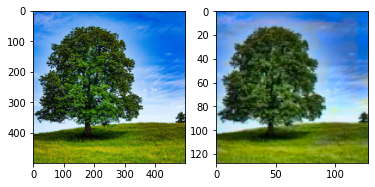

In [67]:
cur = np.zeros((size[0], size[1], 3))
cur[:,:,0] = np.clip(X[0][:,:,0], 0, 100)
cur[:,:,1:] = ab
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(lab2rgb(cur))